<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/fig2_datafull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
import pandas as pd

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
import pandas as pd
#a1=pd.read_csv('/content/drive/MyDrive/is the us/fig2_datafull.csv',encoding = "cp932")

fileDownloaded = drive.CreateFile({'id': '1tO5iXUPcHCN-HopTpwhwJc7u7cD879AT'})
fileDownloaded.GetContentFile('data.csv')

a1 = pd.read_csv('data.csv',encoding = "cp932")

In [8]:
a1.head()

,日経会社コード,企業名称,株式コード,決算期,決算種別,連結基準,<貸借対照表（資産）>資産合計(百万円)[B110],<その他項目>設備投資額［累計］(百万円)[H034],<その他項目>研究開発費［累計］(百万円)[H033]
0,5,宝幸,9999,1985/01,10,1,48088.0,NaN,NaN
1,5,宝幸,9999,1986/01,10,1,48518.0,NaN,NaN
2,5,宝幸,9999,1987/01,10,1,49672.0,NaN,NaN
3,5,宝幸,9999,1988/01,10,1,54919.0,NaN,NaN
4,5,宝幸,9999,1988/09,10,1,55581.0,NaN,NaN


In [9]:
a1 = a1.drop(columns={'決算種別'})
a1 = a1.drop(columns={'連結基準'})
a1 = a1.drop(columns={'企業名称'})	
a1 = a1.drop(columns={'日経会社コード'})

In [10]:
a1 = a1.rename(columns={'決算期':'AP'})
a1 = a1.rename(columns={'<貸借対照表（資産）>資産合計(百万円)[B110]':'assets'})
a1 = a1.rename(columns={'<その他項目>設備投資額［累計］(百万円)[H034]':'Capital expenditures'})
a1 = a1.rename(columns={'<その他項目>研究開発費［累計］(百万円)[H033]':'R&D'})

In [11]:
a1.head()

,株式コード,AP,assets,Capital expenditures,R&D
0,9999,1985/01,48088.0,NaN,NaN
1,9999,1986/01,48518.0,NaN,NaN
2,9999,1987/01,49672.0,NaN,NaN
3,9999,1988/01,54919.0,NaN,NaN
4,9999,1988/09,55581.0,NaN,NaN


In [12]:
a1['fyear'] = a1['AP'].str[:4]
a1['fyear'] = a1['fyear'].astype(int)

In [13]:
a1.head()

,株式コード,AP,assets,Capital expenditures,R&D,fyear
0,9999,1985/01,48088.0,NaN,NaN,1985
1,9999,1986/01,48518.0,NaN,NaN,1986
2,9999,1987/01,49672.0,NaN,NaN,1987
3,9999,1988/01,54919.0,NaN,NaN,1988
4,9999,1988/09,55581.0,NaN,NaN,1988


In [14]:
a1 = a1.drop(columns={'AP'})

In [15]:
a1.head()

,株式コード,assets,Capital expenditures,R&D,fyear
0,9999,48088.0,NaN,NaN,1985
1,9999,48518.0,NaN,NaN,1986
2,9999,49672.0,NaN,NaN,1987
3,9999,54919.0,NaN,NaN,1988
4,9999,55581.0,NaN,NaN,1988


In [16]:
a1["R&D/ASSETS"]=a1["R&D"]/a1["assets"]

In [17]:
a1["Capital expenditures/ASSETS"]=a1["Capital expenditures"]/a1["assets"]

In [18]:
a1.head()

,株式コード,assets,Capital expenditures,R&D,fyear,R&D/ASSETS,Capital expenditures/ASSETS
0,9999,48088.0,NaN,NaN,1985,NaN,NaN
1,9999,48518.0,NaN,NaN,1986,NaN,NaN
2,9999,49672.0,NaN,NaN,1987,NaN,NaN
3,9999,54919.0,NaN,NaN,1988,NaN,NaN
4,9999,55581.0,NaN,NaN,1988,NaN,NaN


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [20]:
dataone = a1.groupby(['fyear'])[['R&D/ASSETS']]
datatwo = a1.groupby(['fyear'])[['Capital expenditures/ASSETS']]

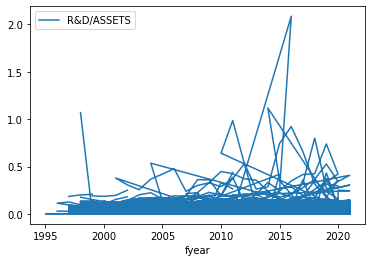

In [21]:
a1.plot('fyear','R&D/ASSETS')

In [22]:
grouped = a1.groupby('fyear').mean()

In [23]:
grouped

,株式コード,assets,Capital expenditures,R&D,R&D/ASSETS,Capital expenditures/ASSETS
fyear,,,,,,
1974,7322.400000,555614.600000,NaN,NaN,NaN,NaN
1975,7075.866667,598702.333333,NaN,NaN,NaN,NaN
1976,7051.235294,588198.941176,NaN,NaN,NaN,NaN
1977,6817.772727,530563.090909,NaN,NaN,NaN,NaN
1978,7108.574468,447584.638298,NaN,NaN,NaN,NaN
1979,7326.452830,443450.132075,NaN,NaN,NaN,NaN
1980,7360.000000,473099.448276,NaN,NaN,NaN,NaN
1981,7289.969231,485423.692308,NaN,NaN,NaN,NaN
1982,7266.536232,530212.608696,NaN,NaN,NaN,NaN


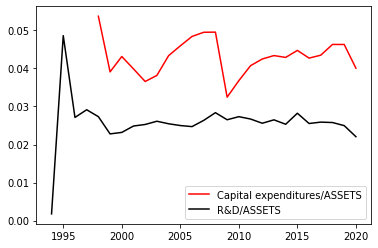

In [28]:
c=list(range(1973,2021))
plt.plot(c, grouped['Capital expenditures/ASSETS'],c='r',label='Capital expenditures/ASSETS')
plt.plot(c, grouped['R&D/ASSETS'],c='k',label='R&D/ASSETS')
plt.legend()